# WeatherPy

---

## Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# added later for linregress
from scipy.stats import linregress

### Generating the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Creating Plots to Showcase the Relationship Between Weather Variables and Latitude

### Using the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
   
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_requests = requests.get(city_url)
        city_weather = city_weather_requests.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | ploemeur
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | inhambane
Processing Record 6 of Set 1 | khuzdar
Processing Record 7 of Set 1 | luanda
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | kulhudhuffushi
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | saint-joseph
Processing Record 15 of Set 1 | haines junction
Processing Record 16 of Set 1 | avera
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | polunochnoye
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | ixtapa
Processing Record 22

Processing Record 36 of Set 4 | east london
Processing Record 37 of Set 4 | abomsa
Processing Record 38 of Set 4 | ilulissat
Processing Record 39 of Set 4 | sola
Processing Record 40 of Set 4 | seymchan
Processing Record 41 of Set 4 | sao miguel dos campos
Processing Record 42 of Set 4 | sioux lookout
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | rawson
Processing Record 45 of Set 4 | gurupa
Processing Record 46 of Set 4 | carauari
Processing Record 47 of Set 4 | muros
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | sungaipenuh
Processing Record 0 of Set 5 | kutum
Processing Record 1 of Set 5 | ballina
Processing Record 2 of Set 5 | illela
Processing Record 3 of Set 5 | yaan
Processing Record 4 of Set 5 | banda aceh
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | manggar
Processing Record 7 of Set 5 | kirkenes
Processing Record 8 of Set 5 | avarua
Processing Record 9 o

City not found. Skipping...
Processing Record 25 of Set 8 | kamaishi
Processing Record 26 of Set 8 | tsumeb
Processing Record 27 of Set 8 | svetlyy
Processing Record 28 of Set 8 | odweyne
Processing Record 29 of Set 8 | beloha
Processing Record 30 of Set 8 | kegayli
City not found. Skipping...
Processing Record 31 of Set 8 | port hedland
Processing Record 32 of Set 8 | ha giang
Processing Record 33 of Set 8 | okha
Processing Record 34 of Set 8 | svetlogorsk
Processing Record 35 of Set 8 | caxito
Processing Record 36 of Set 8 | singkang
Processing Record 37 of Set 8 | awjilah
Processing Record 38 of Set 8 | satitoa
City not found. Skipping...
Processing Record 39 of Set 8 | oboyan
Processing Record 40 of Set 8 | pacifica
Processing Record 41 of Set 8 | novyy urengoy
Processing Record 42 of Set 8 | ust-tsilma
Processing Record 43 of Set 8 | doha
Processing Record 44 of Set 8 | garowe
Processing Record 45 of Set 8 | araouane
Processing Record 46 of Set 8 | reefton
City not found. Skipping

Processing Record 14 of Set 12 | eyl
Processing Record 15 of Set 12 | stokmarknes
Processing Record 16 of Set 12 | mackenzie
Processing Record 17 of Set 12 | acapulco
Processing Record 18 of Set 12 | inuvik
Processing Record 19 of Set 12 | simao
Processing Record 20 of Set 12 | minot
Processing Record 21 of Set 12 | hihifo
City not found. Skipping...
Processing Record 22 of Set 12 | piacabucu
Processing Record 23 of Set 12 | olafsvik
Processing Record 24 of Set 12 | novyy buh
Processing Record 25 of Set 12 | gorontalo
Processing Record 26 of Set 12 | puro
Processing Record 27 of Set 12 | visnes
Processing Record 28 of Set 12 | maxixe
Processing Record 29 of Set 12 | tupik
Processing Record 30 of Set 12 | monzon
Processing Record 31 of Set 12 | prijepolje
Processing Record 32 of Set 12 | neuquen
Processing Record 33 of Set 12 | marrakesh
Processing Record 34 of Set 12 | caete
Processing Record 35 of Set 12 | fukue
Processing Record 36 of Set 12 | necochea
Processing Record 37 of Set 12 

In [4]:
# Converting the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Showing Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Displays sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,7.01,56,0,3.60,CL,1681327603
1,carnarvon,-24.8667,113.6333,21.81,75,8,9.43,AU,1681327773
2,ploemeur,47.7333,-3.4333,11.01,73,100,8.75,FR,1681327633
3,puerto ayora,-0.7393,-90.3518,30.98,85,83,3.58,EC,1681327259
4,inhambane,-23.8650,35.3833,21.99,83,0,0.00,MZ,1681327775


In [6]:
# Exports the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Reads saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,7.01,56,0,3.60,CL,1681327603
1,carnarvon,-24.8667,113.6333,21.81,75,8,9.43,AU,1681327773
2,ploemeur,47.7333,-3.4333,11.01,73,100,8.75,FR,1681327633
3,puerto ayora,-0.7393,-90.3518,30.98,85,83,3.58,EC,1681327259
4,inhambane,-23.8650,35.3833,21.99,83,0,0.00,MZ,1681327775


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# variable short cut
x_axis = city_data_df['Lat']

/Users/megvogel/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


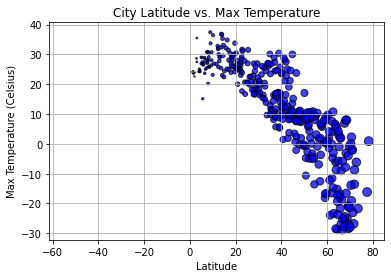

In [9]:
# scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black",
            s=city_data_df['Lat'], alpha=0.75)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

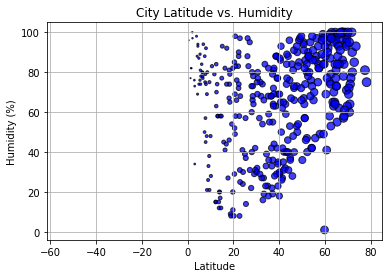

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x_axis, city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black",
            s=city_data_df['Lat'], alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

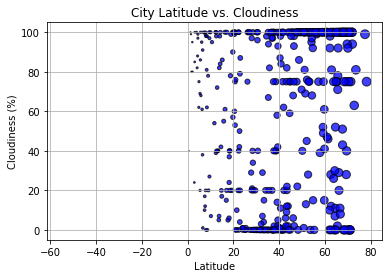

In [11]:
# scatter plots for latitude vs. cloudiness
plt.scatter(x_axis, city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black",
            s=city_data_df['Lat'], alpha=0.75)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

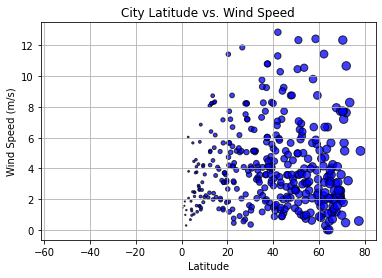

In [18]:
# scatter plots for latitude vs. wind speed
plt.scatter(x_axis, city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black",
            s=city_data_df['Lat'], alpha=0.75)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
# x_values = city_data_df[""]
# y_values = city_data_df[""]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.ylabel("")
# plt.xlabel("")
# print(f"The correlation between {rvalue**2}")
# plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]
northern_hemi_df = northern_hemi_df.reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ploemeur,47.7333,-3.4333,11.01,73,100,8.75,FR,1681327633
1,khuzdar,27.7384,66.6434,22.91,22,29,0.68,PK,1681327775
2,kulhudhuffushi,6.6221,73.0700,28.43,77,1,3.76,MV,1681327777
3,haines junction,60.7522,-137.5108,1.97,41,100,1.54,CA,1681327779
4,avera,33.1940,-82.5271,25.86,27,4,3.40,US,1681327780


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]
southern_hemi_df = southern_hemi_df.reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,7.01,56,0,3.60,CL,1681327603
1,carnarvon,-24.8667,113.6333,21.81,75,8,9.43,AU,1681327773
2,puerto ayora,-0.7393,-90.3518,30.98,85,83,3.58,EC,1681327259
3,inhambane,-23.8650,35.3833,21.99,83,0,0.00,MZ,1681327775
4,luanda,-8.8368,13.2343,24.00,88,75,4.12,AO,1681327653


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7226549553011896


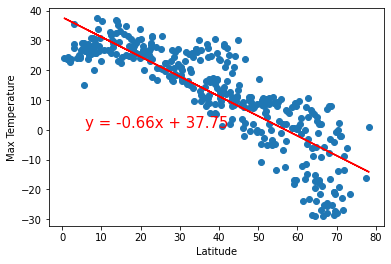

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.5339155299648595


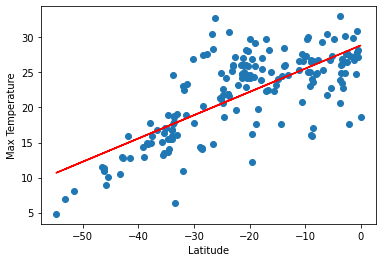

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** there is a negative correlation between latitude and temperature for cities in the northern hemisphere with an r-value of .72. this is the strongest correlation from the analysis but it is still not as strong as we would like. a similar phenomenon is seen with the southern hemisphere. there is a positive correlation between latitude and max temp but it is moderate to weak with an r^2 of only .53.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08394269289795153


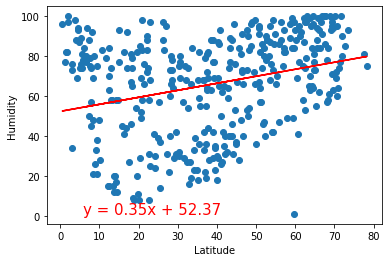

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.06066516862563914


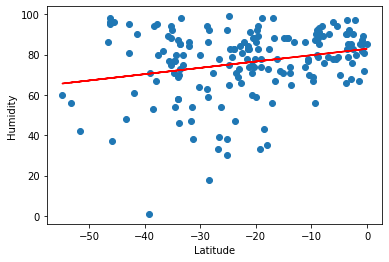

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** again it seems that latitude has nothing to do with humidity. the r^2 values here are both less than .1. this is likely because geographical location and climate are not mutually exclusive.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.007783881552169751


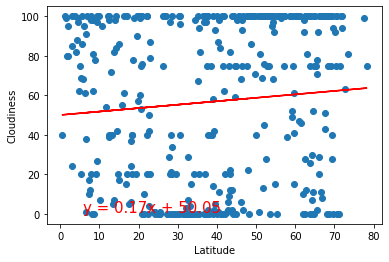

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.031800004138895825


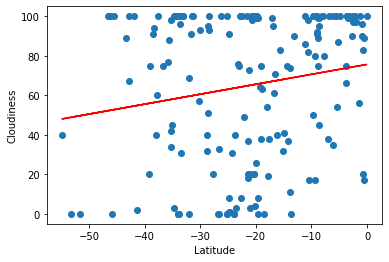

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** while there is a slighly positive correlation between a city's latitudinal location and its overall cloudiness, this correlation is not statistically significant and one could not say that they have an impact on each other.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0011573462788016557


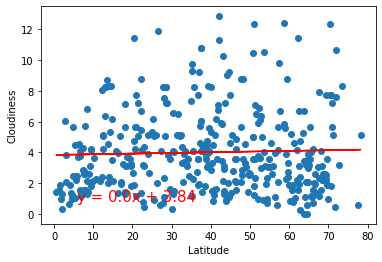

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.06105145282776279


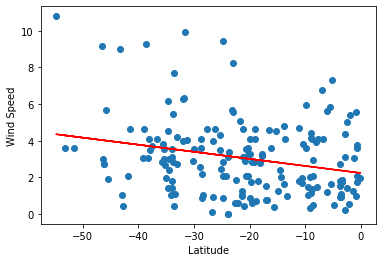

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** there is little to no correlation between latitude of a city and its wind speed